In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\pandas\\Social_Network_Ads.csv")

In [7]:
df.head()

,User ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df=df.iloc[:,2:]

In [14]:
df.sample(5)

,Age,Salary,Purchased
376,46,74000,0
198,26,80000,0
20,45,22000,1
320,52,138000,1
36,33,28000,0


# Train test split

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                      df['Purchased'],
                                                      test_size=0.3,
                                                      random_state=0)
x_train.shape ,x_test.shape

((280, 2), (120, 2))

# StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit the scaler to the train set , it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [31]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [33]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [58]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [60]:
x_train_scaled

,Age,Salary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [62]:
np.round(x_train.describe(),1)

,Age,Salary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [64]:
np.round(x_train_scaled.describe(),1)

# mean=0 ,stand deviation=1 get

,Age,Salary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect  of Scaling

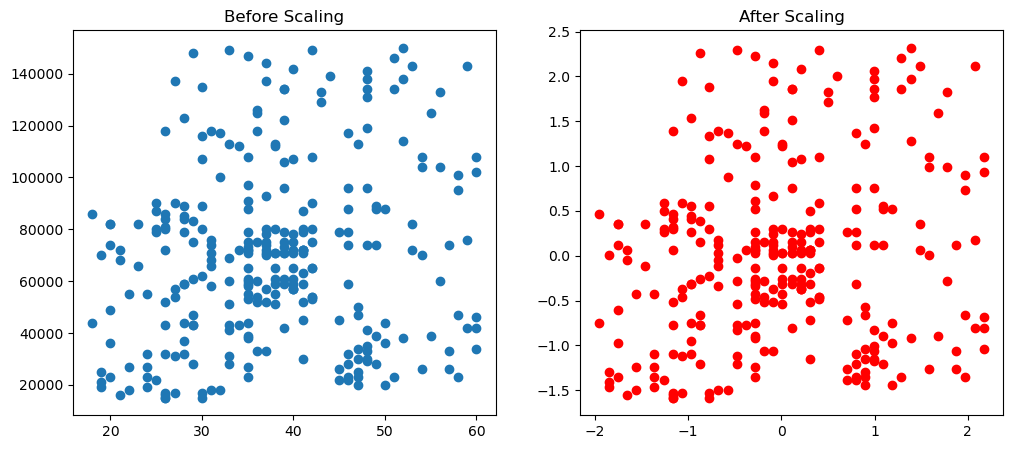

In [67]:
fig,(ax1 ,ax2)=plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['Salary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['Salary'],color='red')
ax2.set_title("After Scaling")
plt.show()

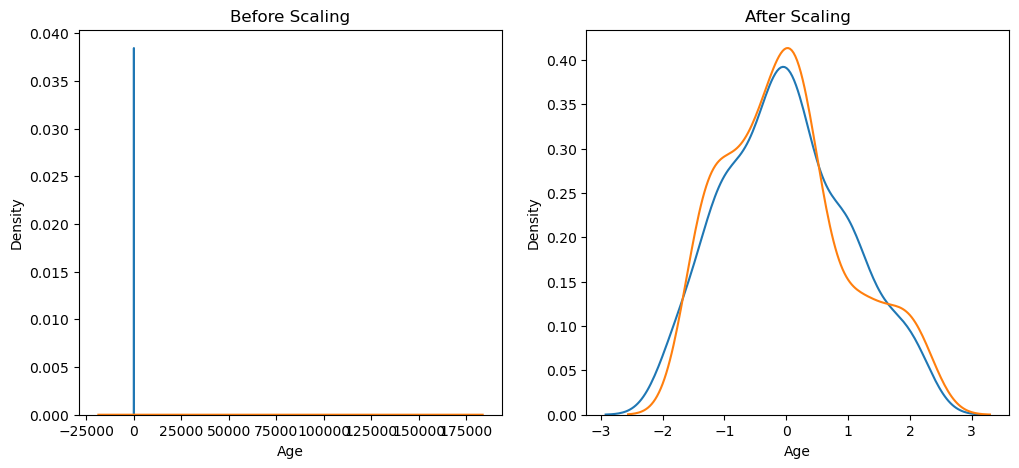

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train["Salary"], ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled["Salary"], ax=ax2)

plt.show()


## Comparison of Distributions

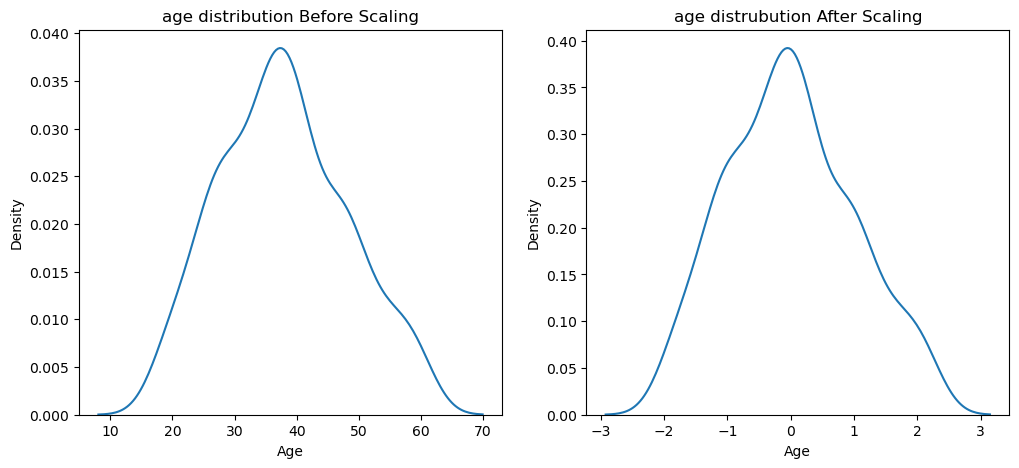

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.set_title("age distribution Before Scaling")
sns.kdeplot(x_train['Age'], ax=ax1)


# After Scaling
ax2.set_title("age distrubution After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)


plt.show()


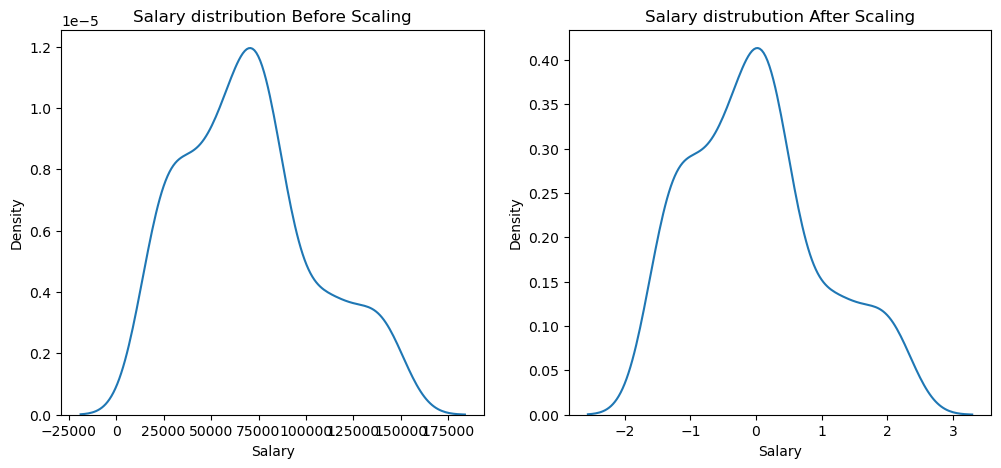

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.set_title("Salary distribution Before Scaling")
sns.kdeplot(x_train['Salary'], ax=ax1)


# After Scaling
ax2.set_title("Salary distrubution After Scaling")
sns.kdeplot(x_train_scaled['Salary'], ax=ax2)


plt.show()


# Why  Scaling is Important ?

In [76]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [81]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [83]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [85]:
from sklearn.metrics import accuracy_score

In [87]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))
# Scaled krne par accuracy bdti h mostly

Actual 0.875
Scaled 0.8666666666666667


In [89]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [93]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [95]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [97]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [99]:
df. describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [124]:
import pandas as pd

df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95],'EstimatedSalary': [1000, 250000, 350000],'Purchased': [0, 1, 1]})], ignore_index=True)




In [126]:
df

,Age,Salary,Purchased,EstimatedSalary
0,19,19000.0,0,NaN
1,35,20000.0,0,NaN
2,26,43000.0,0,NaN
3,27,57000.0,0,NaN
4,19,76000.0,0,NaN
...,...,...,...,...
404,90,NaN,1,250000.0
405,95,NaN,1,350000.0
406,5,NaN,0,1000.0
407,90,NaN,1,250000.0


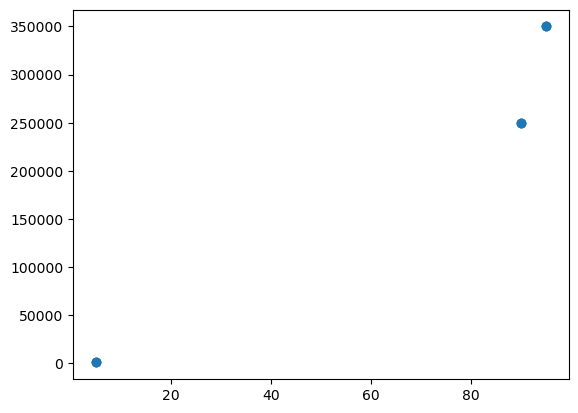

In [128]:
plt.scatter(df['Age'],df['EstimatedSalary'])